<a href="https://colab.research.google.com/github/abdonislas/AIL-time-series-2024/blob/main/transformaciones_ajustes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<br>
<br>

![iteso](https://upload.wikimedia.org/wikipedia/en/5/5f/Western_Institute_of_Technology_and_Higher_Education_logo.png)

<br>
<br>
Clase: Series de tiempo
<br>
Actividad: Transformaciones y ajustes
<br>
<br>

* * *

Docente: Daniel Nuño <br>
Fecha: 18 de septiembre 2024 <br>

* * *

<br>
<br>

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import scipy as sp
import yfinance as yf
import datetime as dt


In [69]:
stock = "NVDA"
ticker = yf.Ticker(stock)
data = ticker.history(start = "2013-01-01", end = dt.datetime.now(), interval = "1mo")["Close"]

In [71]:
data.var()

654.2677317425012

In [72]:
data.std()

25.57865773926578

In [73]:
data.skew()

2.7892109282755055

In [74]:
sp.stats.skew(data, bias=False), sp.stats.skew(data)

(2.789210928275506, 2.759450349217575)

<Axes: >

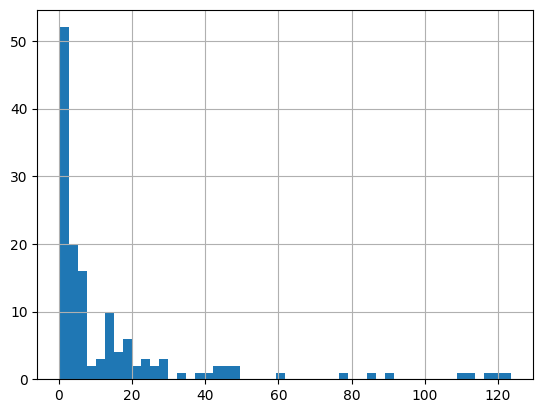

In [75]:
data.hist(bins=50)

<Axes: xlabel='Date'>

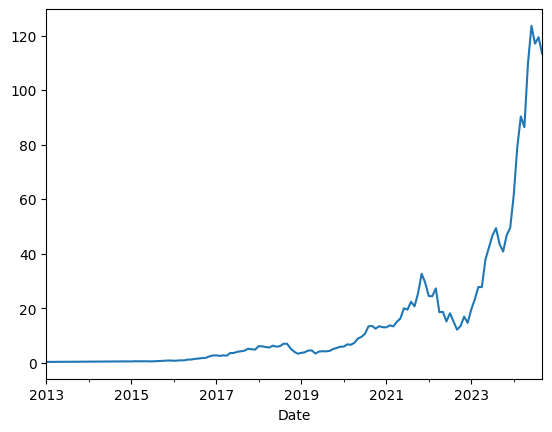

In [76]:
data.plot()

# Transformaciones y ajustes

A menudo, el ajuste de los datos históricos puede dar lugar a series de tiempo más sencillas.

El objetivo de estos ajustes y transformaciones es simplificar los patrones de los datos históricos eliminando las fuentes de variación conocidas o haciendo que el patrón sea más coherente en todo el conjunto de datos. Las pautas más simples suelen ser más fáciles de modelizar y conducen a previsiones más precisas.

Matemáticamente una variable más sencilla tiene una variación más pequeña, sesgo cercado a 0, sin colas a la derecha o izquierda de la distribución, sin valores atípicos, una magnitud similar; sin perder información valiosa.

Esto se puede lograr a partir de diferentes tranformaciones o ajustes. Vamos a analizar algunas.

Utiliza tu serie de tiempo. Decide que transformaciones y ajustes son mejores para tu variable.

Utiliza como comparación el sesgo (una distribución normal tiene sesgo 0) la varianza (o desviación estándar). Complementa visualmente con el histograma (o función de densidad de probabilidad)

## Elimina valores antiguos que no representan la actualidad

In [79]:
data["2022-01-01":].skew()

1.03269534294031

In [80]:
data["2022-01-01":].std()

35.96616288054098

<Axes: xlabel='Date'>

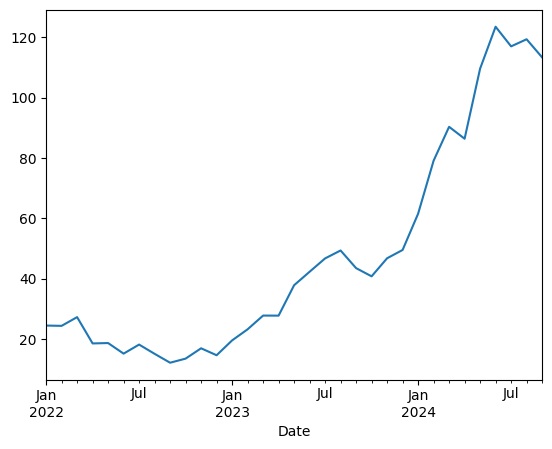

In [81]:
data["2022-01-01":].plot()

<Axes: >

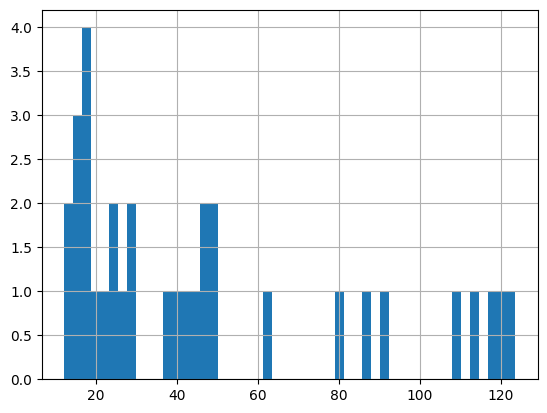

In [82]:
data["2022-01-01":].hist(bins=50)

## Diferenciación

In [83]:
data.diff().skew()

2.8055623922554824

<Axes: xlabel='Date'>

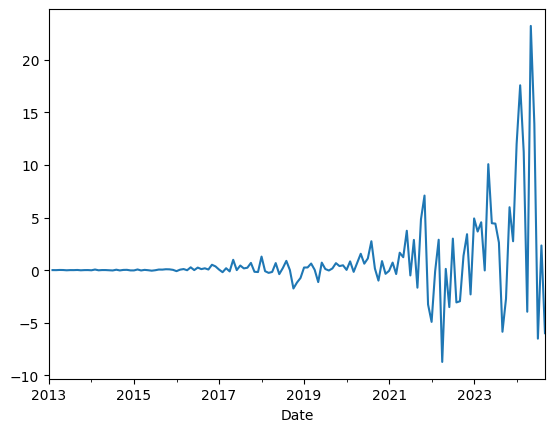

In [84]:
data.diff().plot()

Podemos ver valores atipicos empezando el 2022 que fue cuando los precios de Nvidia se empezaron a disparar gracias a bloqueos económicos que favorecían a la empresa

<Axes: >

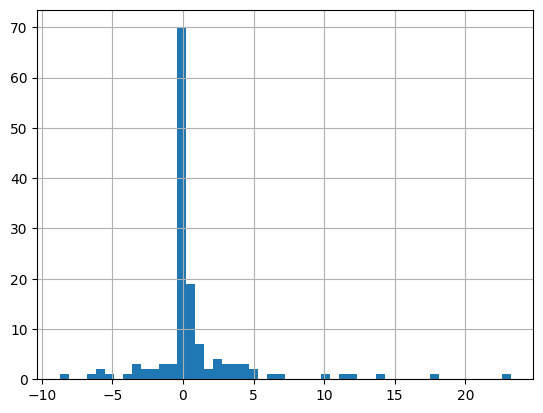

In [85]:
data.diff().hist(bins=50)

apreciamos datos mas normalizados

### Retornos

In [86]:
data.pct_change().skew()

0.02107007999281998

<Axes: xlabel='Date'>

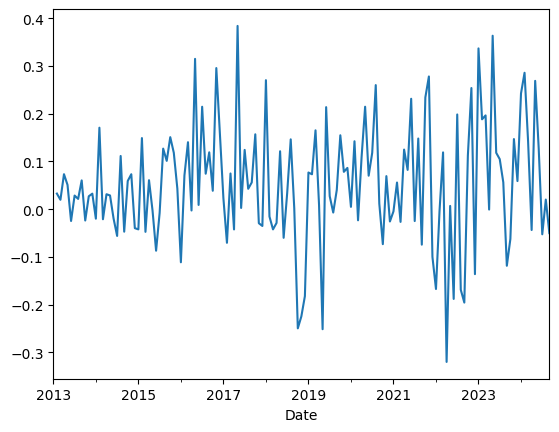

In [87]:
data.pct_change().plot()

Valores atipicos vistos en 2019 y 2022

<Axes: >

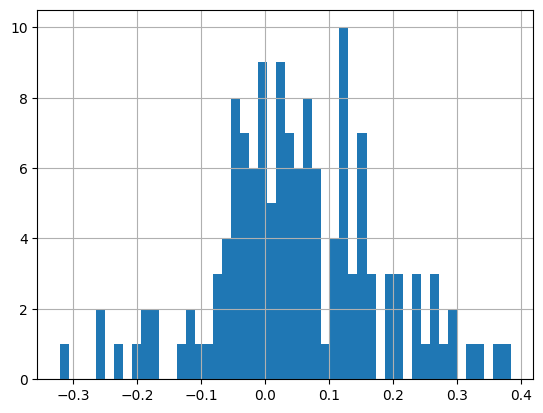

In [88]:
data.pct_change().hist(bins=50)

## Escalamiento y Desplazamiento

### Escalamiento valores máximo y mínimo

$$
Y=\frac{X-\min(X)}{\max(X)-\min(X)}
$$

In [89]:
from sklearn.preprocessing import MinMaxScaler

In [90]:
mM=MinMaxScaler()
Z = mM.fit_transform(data.values.reshape(-1,1))

In [91]:
sp.stats.skew(Z, bias=False)

array([2.78921093])

In [92]:
Z.std()

0.20682037611952953

In [93]:
Z.mean()

0.12055776482231031

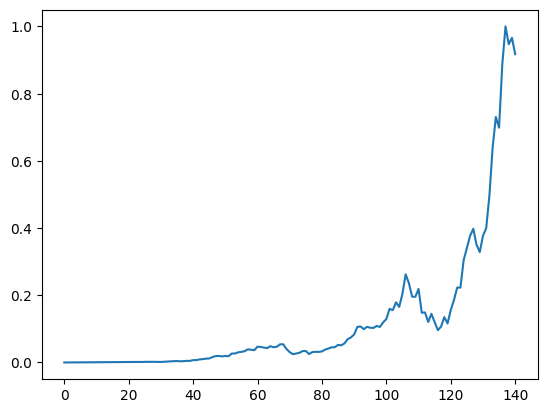

In [94]:
plt.plot(Z)

(array([52., 20., 16.,  2.,  3., 10.,  4.,  6.,  2.,  3.,  2.,  3.,  0.,
         1.,  0.,  1.,  1.,  2.,  2.,  2.,  0.,  0.,  0.,  0.,  1.,  0.,
         0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  1.,  1.,  1.]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
        0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
        0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
        0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
        0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  ]),
 <BarContainer object of 50 artists>)

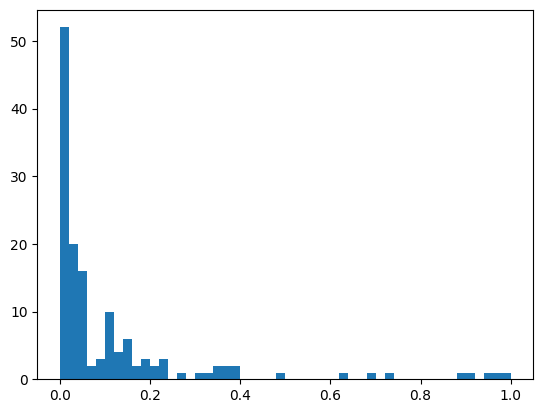

In [95]:
plt.hist(Z, bins=50)

### Desplazamiento

In [96]:
Z = Z + 1 # si quieres desplazar, en éste caso mayor a 1

In [97]:
sp.stats.skew(Z, bias=False)

array([2.78921093])

In [98]:
Z.std()

0.20682037611952953

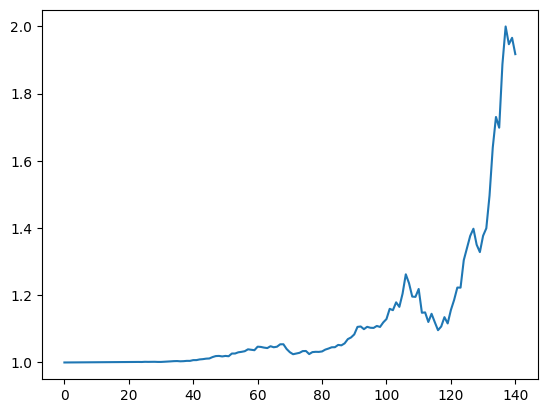

In [100]:
plt.plot(Z)

(array([52., 20., 16.,  2.,  3., 10.,  4.,  6.,  2.,  3.,  2.,  3.,  0.,
         1.,  0.,  1.,  1.,  2.,  2.,  2.,  0.,  0.,  0.,  0.,  1.,  0.,
         0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  1.,  1.,  1.]),
 array([1.  , 1.02, 1.04, 1.06, 1.08, 1.1 , 1.12, 1.14, 1.16, 1.18, 1.2 ,
        1.22, 1.24, 1.26, 1.28, 1.3 , 1.32, 1.34, 1.36, 1.38, 1.4 , 1.42,
        1.44, 1.46, 1.48, 1.5 , 1.52, 1.54, 1.56, 1.58, 1.6 , 1.62, 1.64,
        1.66, 1.68, 1.7 , 1.72, 1.74, 1.76, 1.78, 1.8 , 1.82, 1.84, 1.86,
        1.88, 1.9 , 1.92, 1.94, 1.96, 1.98, 2.  ]),
 <BarContainer object of 50 artists>)

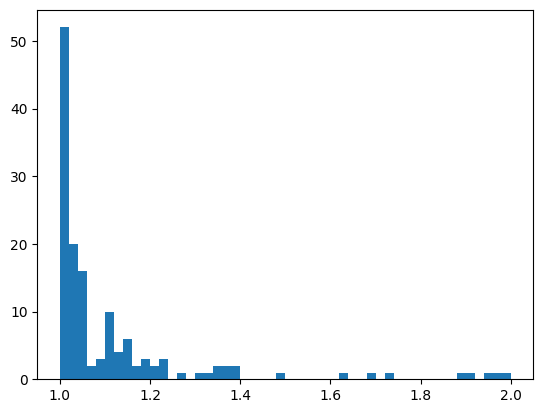

In [101]:
plt.hist(Z, bins=50)

## Estandarización

Estandarización
$$
Z=\frac{X-\bar{x}}{\sigma},
$$
donde $\bar{x}$ es la media aritmética del conjunto $X$ y $\sigma$ es su desviasión estándar.

In [102]:
from sklearn.preprocessing import StandardScaler

In [103]:
est = StandardScaler()
Z = est.fit_transform(data.values.reshape(-1,1))

In [104]:
sp.stats.skew(Z, bias=False)

array([2.78921093])

In [105]:
Z.std()

1.0

In [106]:
Z.mean()

-5.039310182695746e-17

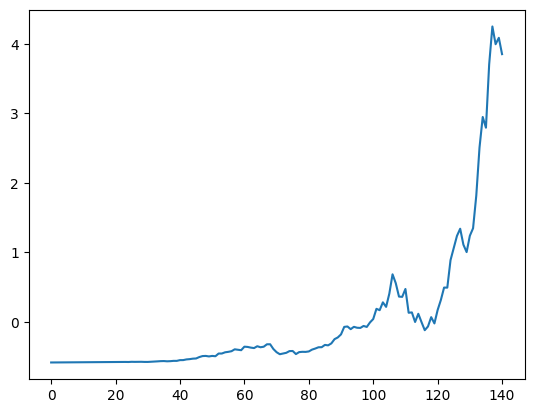

In [107]:
plt.plot(Z)

(array([52., 20., 16.,  2.,  3., 10.,  4.,  6.,  2.,  3.,  2.,  3.,  0.,
         1.,  0.,  1.,  1.,  2.,  2.,  2.,  0.,  0.,  0.,  0.,  1.,  0.,
         0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  1.,  1.,  1.]),
 array([-5.82910481e-01, -4.86208210e-01, -3.89505939e-01, -2.92803668e-01,
        -1.96101398e-01, -9.93991270e-02, -2.69685624e-03,  9.40054145e-02,
         1.90707685e-01,  2.87409956e-01,  3.84112227e-01,  4.80814497e-01,
         5.77516768e-01,  6.74219039e-01,  7.70921309e-01,  8.67623580e-01,
         9.64325851e-01,  1.06102812e+00,  1.15773039e+00,  1.25443266e+00,
         1.35113493e+00,  1.44783720e+00,  1.54453948e+00,  1.64124175e+00,
         1.73794402e+00,  1.83464629e+00,  1.93134856e+00,  2.02805083e+00,
         2.12475310e+00,  2.22145537e+00,  2.31815764e+00,  2.41485991e+00,
         2.51156218e+00,  2.60826445e+00,  2.70496672e+00,  2.80166899e+00,
         2.89837127e+00,  2.9950

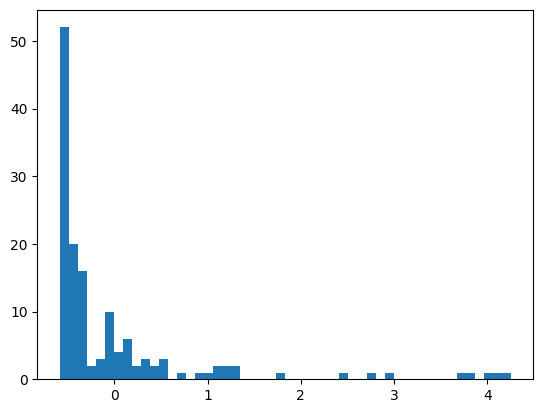

In [108]:
plt.hist(Z, bins=50)

## Outliers

### Tres Desviaciones estándar

In [109]:
sum(np.abs(sp.stats.zscore(data)) > 3)

5

In [110]:
data[(np.abs(sp.stats.zscore(data)) < 3)]

,Close
Date,
2013-01-01 00:00:00-05:00,0.282920
2013-02-01 00:00:00-05:00,0.292150
2013-03-01 00:00:00-05:00,0.297890
2013-04-01 00:00:00-04:00,0.319715
2013-05-01 00:00:00-04:00,0.335968
...,...
2023-12-01 00:00:00-05:00,49.507023
2024-01-01 00:00:00-05:00,61.513794
2024-02-01 00:00:00-05:00,79.095024


### Quartiles (tukey fence)

1.5 (o 3) veces el rango intercuartílico

In [111]:
q1=data.quantile(0.25)
q3=data.quantile(0.75)
iqr=q3-q1
iqr

15.444871723651886

In [113]:
tabla=pd.DataFrame(index=["Close"])
tabla['L_Inferior']=q1-1.5*iqr
tabla['L_superior']=q3+1.5*iqr
tabla

,L_Inferior,L_superior
Close,-22.402094,39.377393


In [114]:
tabla=pd.DataFrame(index=["remesas"])
tabla['L_Inferior']=q1-3*iqr
tabla['L_superior']=q3+3*iqr
tabla

,L_Inferior,L_superior
remesas,-45.569402,62.5447


In [115]:
data[data > q3+1.5*iqr]

,Close
Date,
2023-06-01 00:00:00-04:00,42.281345
2023-07-01 00:00:00-04:00,46.711014
2023-08-01 00:00:00-04:00,49.336006
2023-09-01 00:00:00-04:00,43.482265
2023-10-01 00:00:00-04:00,40.767666
2023-11-01 00:00:00-04:00,46.755852
2023-12-01 00:00:00-05:00,49.507023
2024-01-01 00:00:00-05:00,61.513794
2024-02-01 00:00:00-05:00,79.095024


{'whiskers': [<matplotlib.lines.Line2D at 0x7e3784c2d960>,
 'caps': [<matplotlib.lines.Line2D at 0x7e3784c2dea0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7e3784c2d6c0>],
 'medians': [<matplotlib.lines.Line2D at 0x7e3784c2e3e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7e3784c2e680>],
 'means': []}

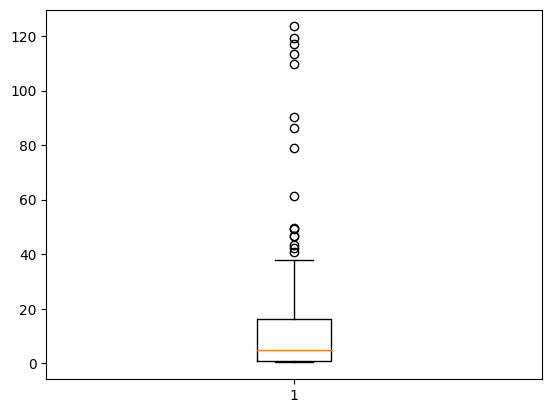

In [116]:
plt.boxplot(data)

Encuentra los valores atípicos usando el cambio porcentual de la serie o recortando la serie. ¿Llegas a la misma conclusión?

In [122]:
# Usando el cambio porcentual
pct_change_data = data.pct_change()
q1_pct = pct_change_data.quantile(0.25)
q3_pct = pct_change_data.quantile(0.75)
iqr_pct = q3_pct - q1_pct

outliers_pct_upper = pct_change_data[pct_change_data > q3_pct + 1.5 * iqr_pct]
outliers_pct_lower = pct_change_data[pct_change_data < q1_pct - 1.5 * iqr_pct]

print("Outliers usando cambio porcentual (superior):")
print(outliers_pct_upper)
print("\nOutliers usando cambio porcentual (inferior):")
print(outliers_pct_lower)


# Recortando la serie (por ejemplo, eliminando el 1% superior e inferior)
lower_bound = data.quantile(0.01)
upper_bound = data.quantile(0.99)
trimmed_data = data[(data >= lower_bound) & (data <= upper_bound)]

outliers_trimmed = data[~data.isin(trimmed_data)]
print("\nOutliers usando recorte de la serie:")
print(outliers_trimmed)


Outliers usando cambio porcentual (superior):
Date
2017-05-01 00:00:00-04:00    0.383988
2023-05-01 00:00:00-04:00    0.363437
Name: Close, dtype: float64

Outliers usando cambio porcentual (inferior):
Date
2019-05-01 00:00:00-04:00   -0.251602
2022-04-01 00:00:00-04:00   -0.320158
Name: Close, dtype: float64

Outliers usando recorte de la serie:
Date
2013-01-01 00:00:00-05:00      0.282920
2013-02-01 00:00:00-05:00      0.292150
2024-06-01 00:00:00-04:00    123.519287
2024-08-01 00:00:00-04:00    119.359795
Name: Close, dtype: float64


### sustitución de outliers

Después de encontrar los outliers, la labor es decidir que hacer con ellos. Puedes sustituir por la media, usar el periodo anterior, o el periodo estacional pasado.

In [130]:

data[data > q3+3*iqr] = mnean(data)

NameError: name 'mnean' is not defined

Existen otros métodos para detectar valores atípicos. Consulta más en:

https://scikit-learn.org/stable/modules/outlier_detection.html

### Fechas importantes

In [131]:
data.pct_change().sort_values()

,Close
Date,
2024-02-01 00:00:00-05:00,-0.753876
2022-04-01 00:00:00-04:00,-0.320158
2019-05-01 00:00:00-04:00,-0.251602
2018-10-01 00:00:00-04:00,-0.249768
2018-11-01 00:00:00-04:00,-0.224826
...,...
2016-05-01 00:00:00-04:00,0.314945
2023-01-01 00:00:00-05:00,0.336869
2023-05-01 00:00:00-04:00,0.363437


In [136]:
fecha_2024 = pd.Series(data = [1], index=["2024-02-01"], name = "2024")
fecha_2022 = pd.Series(data = [1], index=["2022-04-01"], name = "2022")
fecha_2019 = pd.Series(data = [1], index=["2019-05-01"], name = "2019")
fecha_2018 = pd.Series(data = [1], index=["2018-10-01"], name = "2018")
fecha_2018_2 = pd.Series(data = [1], index=["2018-11-01"], name = "2018")

In [137]:
fecha_2024

,2024
2024-02-01,1


## Transformaciones matemáticas

### Logaritmo natural (log)

In [138]:
np.log(data).skew()

-0.24069176402529144

In [139]:
np.log(data).std()

1.5777611101758706

<Axes: xlabel='Date'>

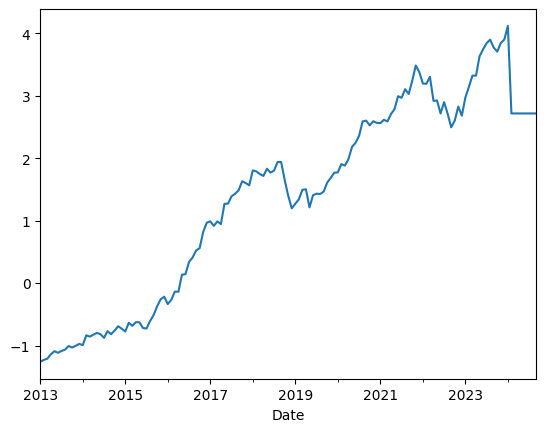

In [140]:
np.log(data).plot()

<Axes: >

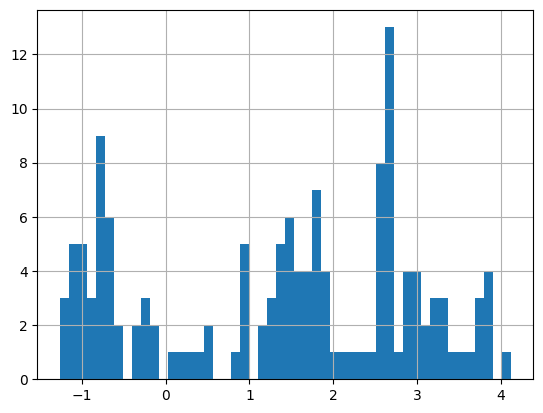

In [141]:
np.log(data).hist(bins=50)

### BoxCox

In [142]:
sp.stats.skew(sp.stats.boxcox(data)[0], bias=False)

-0.06491887383025406

In [143]:
np.std(sp.stats.boxcox(data)[0])

1.7842864763314317

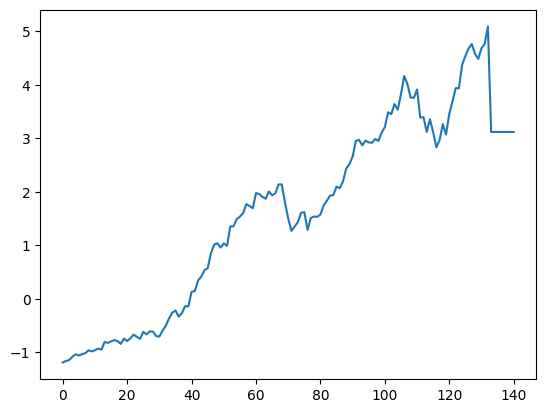

In [144]:
plt.plot(sp.stats.boxcox(data)[0])

(array([ 4.,  3., 10., 12.,  7., 11., 11.,  6.,  7.,  3.,  4.,  7.,  7.,
         4.,  1.,  1.,  1.,  4.,  0.,  7.,  4.,  7.,  6., 12., 24., 25.,
        18., 22., 24.,  8., 12.,  5.,  7.,  3.,  7.,  6.,  4.,  3.,  5.,
         1.,  2.,  2.,  2.,  3.,  7.,  3.,  6.,  2.,  4.,  4.]),
 array([18.49507686, 19.45826809, 20.42145931, 21.38465054, 22.34784177,
        23.311033  , 24.27422423, 25.23741546, 26.20060669, 27.16379792,
        28.12698915, 29.09018038, 30.05337161, 31.01656284, 31.97975406,
        32.94294529, 33.90613652, 34.86932775, 35.83251898, 36.79571021,
        37.75890144, 38.72209267, 39.6852839 , 40.64847513, 41.61166636,
        42.57485759, 43.53804881, 44.50124004, 45.46443127, 46.4276225 ,
        47.39081373, 48.35400496, 49.31719619, 50.28038742, 51.24357865,
        52.20676988, 53.16996111, 54.13315234, 55.09634356, 56.05953479,
        57.02272602, 57.98591725, 58.94910848, 59.91229971, 60.87549094,
        61.83868217, 62.8018734 , 63.76506463, 64.72825586,

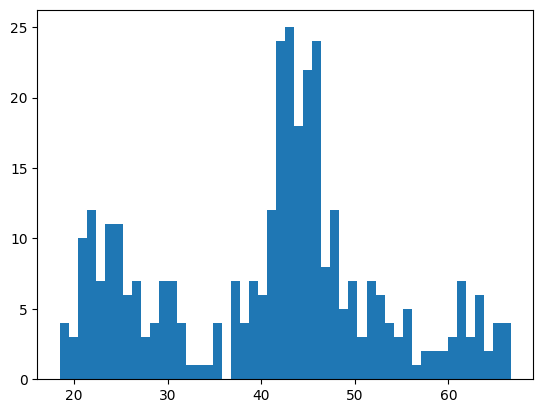

In [ ]:
plt.hist(sp.stats.boxcox(data)[0], bins=50)

In [ ]:
sp.stats.boxcox(data)[1] #lambda

0.3761733319183594